In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e2/sample_submission.csv
/kaggle/input/playground-series-s3e2/train.csv
/kaggle/input/playground-series-s3e2/test.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_df=pd.read_csv('/kaggle/input/playground-series-s3e2/train.csv',index_col='id')
test_df=pd.read_csv('/kaggle/input/playground-series-s3e2/test.csv',index_col='id')
train_df.tail(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
15294,Male,79.0,0,0,Yes,Private,Rural,60.98,24.7,Unknown,1
15295,Male,12.0,0,0,No,children,Urban,69.78,14.3,never smoked,0
15296,Female,5.0,0,0,No,children,Urban,73.92,13.5,Unknown,0
15297,Female,32.0,0,0,No,Private,Urban,75.06,32.4,smokes,0
15298,Female,17.0,0,0,No,Private,Rural,77.65,24.8,smokes,0
15299,Female,22.0,0,0,No,Govt_job,Urban,72.63,19.5,never smoked,0
15300,Female,46.0,1,0,Yes,Private,Urban,101.19,32.1,never smoked,0
15301,Female,75.0,0,0,Yes,Self-employed,Urban,87.69,26.2,never smoked,0
15302,Male,46.0,0,0,Yes,Private,Rural,101.13,22.5,Unknown,0


In [4]:
train_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
15299,Female,22.0,0,0,No,Govt_job,Urban,72.63,19.5,never smoked,0
15300,Female,46.0,1,0,Yes,Private,Urban,101.19,32.1,never smoked,0
15301,Female,75.0,0,0,Yes,Self-employed,Urban,87.69,26.2,never smoked,0


# Exploring Data

In [5]:
train_df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [6]:
train_df.shape

(15304, 11)

In [7]:
train_df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [8]:
for i in train_df.columns:
  print(train_df[i].value_counts(normalize=True)*100)
  print(train_df[i].nunique())
  print("******************************")

Female    61.722426
Male      38.271040
Other      0.006534
Name: gender, dtype: float64
3
******************************
57.00    2.306587
78.00    2.202039
53.00    2.032148
31.00    2.025614
45.00    2.019080
           ...   
0.16     0.039205
0.08     0.039205
0.48     0.019603
1.30     0.013068
0.68     0.006534
Name: age, Length: 106, dtype: float64
106
******************************
0    95.027444
1     4.972556
Name: hypertension, dtype: float64
2
******************************
0    97.667277
1     2.332723
Name: heart_disease, dtype: float64
2
******************************
Yes    67.858076
No     32.141924
Name: ever_married, dtype: float64
2
******************************
Private          63.721903
children         13.316780
Self-employed    12.669890
Govt_job         10.016989
Never_worked      0.274438
Name: work_type, dtype: float64
5
******************************
Rural    50.078411
Urban    49.921589
Name: Residence_type, dtype: float64
2
******************************

In [9]:
train_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,15304,3,Female,9446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,15304.0,NaN,NaN,NaN,41.417708,21.444673,0.08,26.0,43.0,57.0,82.0
hypertension,15304.0,NaN,NaN,NaN,0.049726,0.217384,0.0,0.0,0.0,0.0,1.0
heart_disease,15304.0,NaN,NaN,NaN,0.023327,0.150946,0.0,0.0,0.0,0.0,1.0
ever_married,15304,2,Yes,10385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_type,15304,5,Private,9752,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Residence_type,15304,2,Rural,7664,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_glucose_level,15304.0,NaN,NaN,NaN,89.039853,25.476102,55.22,74.9,85.12,96.98,267.6
bmi,15304.0,NaN,NaN,NaN,28.112721,6.722315,10.3,23.5,27.6,32.0,80.1
smoking_status,15304,4,never smoked,6281,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
train_df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [12]:
#Pie chart for spotting number of fraud and non fraud claims 
plt.figure(figsize=[10,10])
fig = px.pie(train_df,names='stroke')
fig.show()


<Figure size 720x720 with 0 Axes>

From the above chart, we see that the data is imbalanced

In [13]:
obj_atr=train_df.select_dtypes(["object"]).columns

In [14]:
obj_atr

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

# EDA

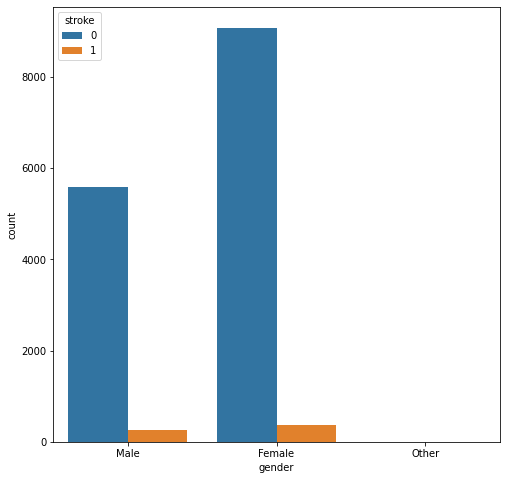

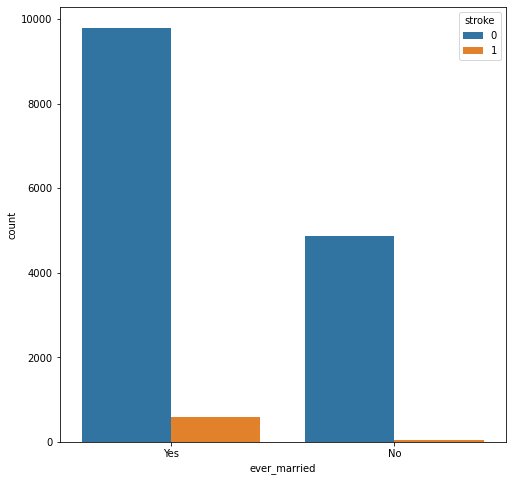

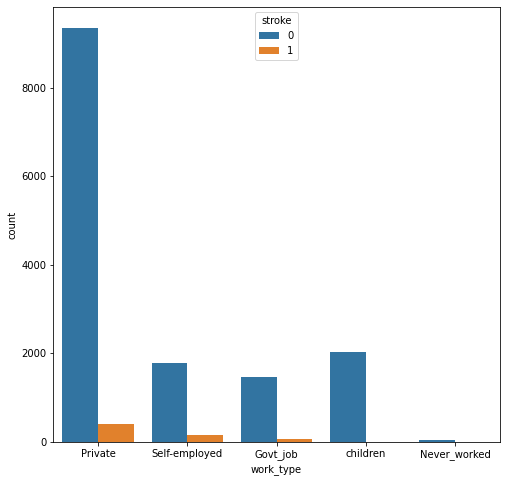

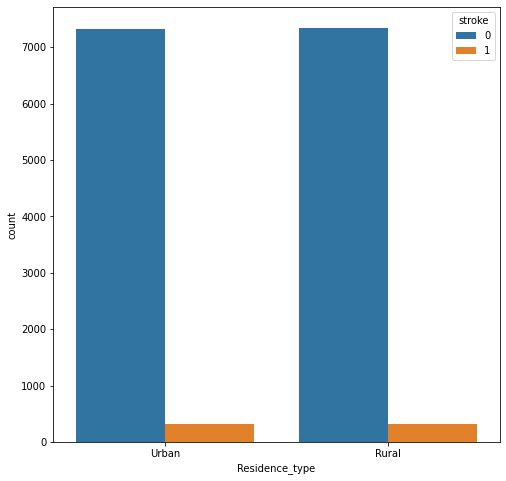

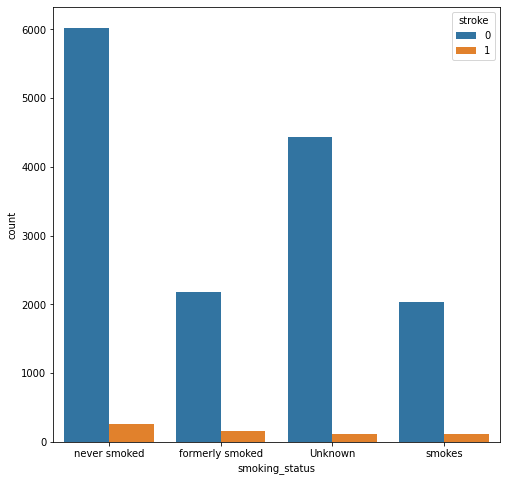

In [15]:
#create count plots between categorical columns and stroke 
for col in obj_atr:
    plt.figure(figsize=(8,8))
    sns.countplot(data=train_df,x=col,hue='stroke')
    plt.show()

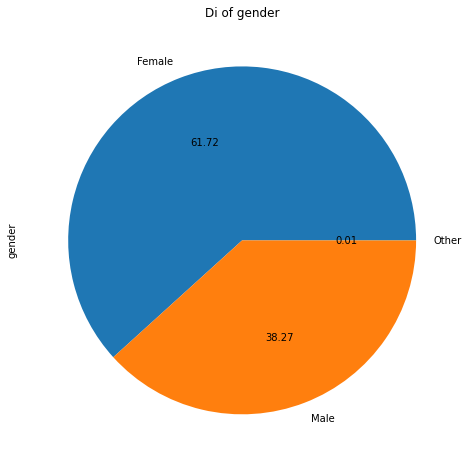

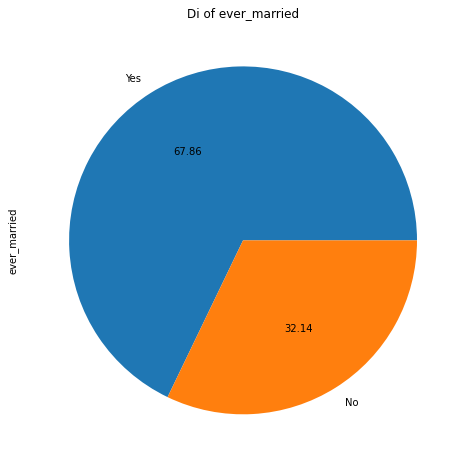

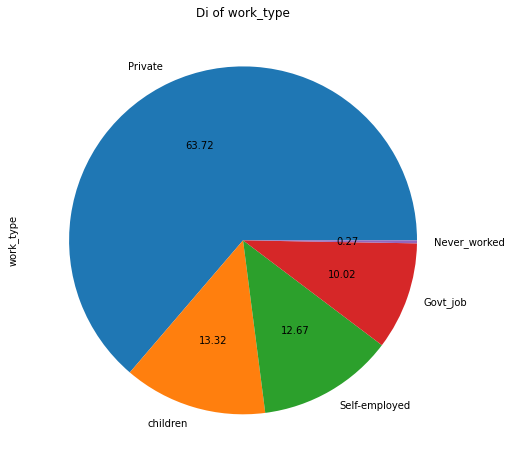

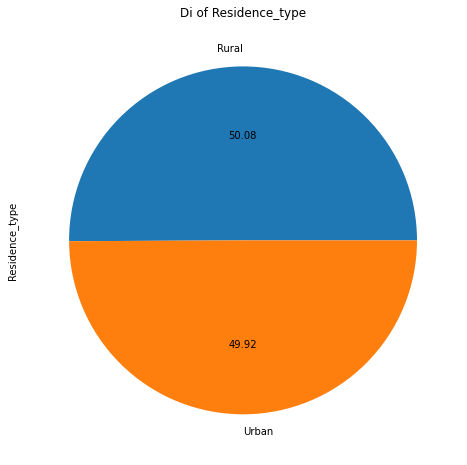

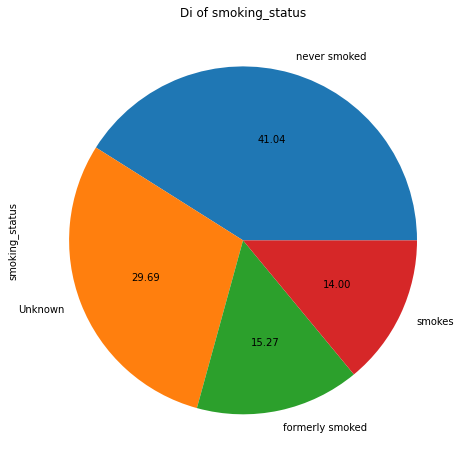

In [16]:
#categorical analysis of respndents
for col in obj_atr:
    train_df[col].value_counts().plot(kind='pie',figsize=(10,8),title='Di of '+col,autopct='%.2f')
    plt.show()

# Preprossesing

In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, GridSearchCV

from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay

In [18]:
train_df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

# Model building

In [19]:
from sklearn.linear_model import LogisticRegression
train_data = train_df.copy()
test_data = test_df.copy()

## Defining scaler
scaler = MinMaxScaler()

## Defining inputs and target
train_dummies = pd.get_dummies(train_data[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']])
train_dummies = train_dummies.drop(columns = ['gender_Other', 'ever_married_No', 'work_type_children', 'Residence_type_Urban', 'smoking_status_Unknown'])

X = train_data.drop(columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke'], axis = 1)
X = pd.concat([X, train_dummies], axis = 1)
Y = train_data['stroke']

test_dummies = pd.get_dummies(test_data[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']])
test_dummies = test_dummies.drop(columns = ['gender_Other', 'ever_married_No', 'work_type_children', 'Residence_type_Urban', 'smoking_status_Unknown'])

test_data = test_data.drop(columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], axis = 1)
test_data = pd.concat([test_data, test_dummies], axis = 1)
test_data = pd.DataFrame(scaler.fit_transform(test_data), columns = test_data.columns)

cv_scores, roc_auc_scores = list(), list()
preds = list()

## Running 10 times CV
for i in range(10):
    
    skf = StratifiedKFold(n_splits = 10, random_state = 42, shuffle = True)
    
    for train_ix, test_ix in skf.split(X, Y):
        
        ## Splitting the data 
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        Y_train, Y_test = Y.iloc[train_ix], Y.iloc[test_ix]
        
        ## Scaling the data
        X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
        X_test = pd.DataFrame(scaler.fit_transform(X_test), columns = X.columns)
        
        ## Building logistic model
        logit_md = LogisticRegression(C = 0.2, penalty = 'l1', solver = 'saga', max_iter = 1000).fit(X_train, Y_train)
        
        ## Predicting on X_test and test
        logit_pred_1 = logit_md.predict_proba(X_test)[:, 1]
        logit_pred_2 = logit_md.predict_proba(test_data)[:, 1]
        
        ## Computing roc-auc score
        roc_auc_scores.append(roc_auc_score(Y_test, logit_pred_1))
        preds.append(logit_pred_2)
        
    cv_scores.append(np.mean(roc_auc_scores))

logit_cv_score = np.mean(cv_scores)    
print('The roc-auc score over 10-folds (run 10 times) is:', logit_cv_score)

The roc-auc score over 10-folds (run 10 times) is: 0.8838442168785935


In [20]:
## Building model in the entire train dataset
logit_md = LogisticRegression(C = 0.2, penalty = 'l1', solver = 'saga', max_iter = 10000).fit(X, Y)

train_preds = pd.DataFrame({'stroke': Y, 'stroke_pred': logit_md.predict_proba(X)[:, 1]})
train_preds.head()

,stroke,stroke_pred
id,,
0,0,0.004354
1,0,0.007500
2,0,0.013772
3,0,0.034710
4,0,0.003920


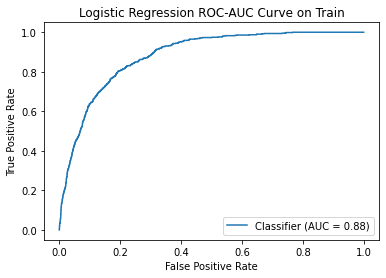

In [21]:
RocCurveDisplay.from_predictions(train_preds['stroke'], train_preds['stroke_pred'])
plt.title('Logistic Regression ROC-AUC Curve on Train')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

In [22]:
logit_preds_train = train_preds['stroke_pred']
logit_preds_test = pd.DataFrame(preds).apply(np.mean, axis = 0)

In [23]:
submission = pd.read_csv('../input/playground-series-s3e2/sample_submission.csv')
submission['stroke'] = logit_preds_test
submission.to_csv('logistic_submission.csv', index = False)

In [24]:
submission

,id,stroke
0,15304,0.038039
1,15305,0.153283
2,15306,0.000482
3,15307,0.043100
4,15308,0.008254
...,...,...
10199,25503,0.002614
10200,25504,0.023449
10201,25505,0.000413
10202,25506,0.004155


In [25]:
from sklearn.ensemble import RandomForestClassifier

## Running 10 times CV
for i in range(10):
    
    skf = StratifiedKFold(n_splits = 10, random_state = 42, shuffle = True)
    
    for train_ix, test_ix in skf.split(X, Y):
        
        ## Splitting the data 
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        Y_train, Y_test = Y.iloc[train_ix], Y.iloc[test_ix]
    
        ## Building RF model
        RF_md = RandomForestClassifier(max_depth = 7, min_samples_leaf = 5, min_samples_split = 2, n_estimators = 300).fit(X_train, Y_train)
        
        ## Predicting on X_test and test
        RF_pred_1 = RF_md.predict_proba(X_test)[:, 1]
        RF_pred_2 = RF_md.predict_proba(test_data)[:, 1]
        
        ## Computing roc-auc score
        roc_auc_scores.append(roc_auc_score(Y_test, RF_pred_1))
        preds.append(RF_pred_2)
        
    cv_scores.append(np.mean(roc_auc_scores))

RF_cv_score = np.mean(cv_scores)    
print('The roc-auc score over 10-folds (run 10 times) is:', RF_cv_score)

The roc-auc score over 10-folds (run 10 times) is: 0.8842935430592099


In [26]:
## Building model in the entire train dataset
RF_md = RandomForestClassifier(max_depth = 7, min_samples_leaf = 5, min_samples_split = 2, n_estimators = 300).fit(X, Y)

train_preds = pd.DataFrame({'stroke': Y, 'stroke_pred': RF_md.predict_proba(X)[:, 1]})
train_preds.head()

,stroke,stroke_pred
id,,
0,0,0.013825
1,0,0.016701
2,0,0.015530
3,0,0.035203
4,0,0.004637


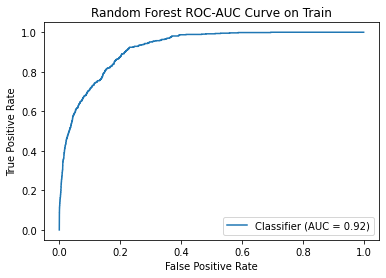

In [27]:
RocCurveDisplay.from_predictions(train_preds['stroke'], train_preds['stroke_pred'])
plt.title('Random Forest ROC-AUC Curve on Train')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

In [28]:
RF_preds_train = train_preds['stroke_pred']
RF_preds_test = pd.DataFrame(preds).apply(np.mean, axis = 0)

In [29]:
submission['stroke'] = RF_preds_test
submission.to_csv('RandomForest_submission.csv', index = False)

In [30]:
submission

,id,stroke
0,15304,0.028276
1,15305,0.109623
2,15306,0.001846
3,15307,0.035153
4,15308,0.017761
...,...,...
10199,25503,0.004846
10200,25504,0.023400
10201,25505,0.002128
10202,25506,0.012831


In [31]:
from xgboost import XGBClassifier

## Running 10 times CV
for i in range(10):
    
    skf = StratifiedKFold(n_splits = 10, random_state = 42, shuffle = True)
    
    for train_ix, test_ix in skf.split(X, Y):
        
        ## Splitting the data 
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        Y_train, Y_test = Y.iloc[train_ix], Y.iloc[test_ix]
    
        ## Building XGB model
        XGB_md = XGBClassifier(colsample_bytree = 0.8, 
                               gamma = 0.3, 
                               learning_rate = 0.01, 
                               max_depth = 5, 
                               min_child_weight = 10, 
                               n_estimators = 500, 
                               subsample = 0.8).fit(X_train, Y_train)
        
        ## Predicting on X_test and test
        XGB_pred_1 = XGB.predict_proba(X_test)[:, 1]
        XGB_pred_2 = XGB.predict_proba(test_data)[:, 1]
        
        ## Computing roc-auc score
        roc_auc_scores.append(roc_auc_score(Y_test, XGB_pred_1))
        preds.append(XGB_pred_2)
        
    cv_scores.append(np.mean(roc_auc_scores))

XGB_cv_score = np.mean(cv_scores)    
print('The roc-auc score over 10-folds (run 10 times) is:', XGB_cv_score)

NameError: name 'XGB' is not defined

In [ ]:
## Building model in the entire train dataset
XGB = XGBClassifier(colsample_bytree = 0.8, 
                       gamma = 0.3, 
                       learning_rate = 0.01, 
                       max_depth = 5, 
                       min_child_weight = 10, 
                       n_estimators = 500, 
                       subsample = 0.8).fit(X, Y)

train_preds = pd.DataFrame({'stroke': Y, 'stroke_pred': XGB.predict_proba(X)[:, 1]})
train_preds.head()

In [ ]:
RocCurveDisplay.from_predictions(train_preds['stroke'], train_preds['stroke_pred'])
plt.title('XGBoost ROC-AUC Curve on Train')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

In [ ]:
XGB_preds_train = train_preds['stroke_pred']
XGB_preds_test = pd.DataFrame(preds).apply(np.mean, axis = 0)

In [ ]:
submission['stroke'] = XGB_preds_test
submission.to_csv('XGB_submission.csv', index = False)

In [ ]:
submission